In [2]:
from model.vqvae import vqvae

import yaml
import torch
import matplotlib.pyplot as plt

with open("./config/vqvae.yaml") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
model = vqvae(config)
ckpt = torch.load("./checkpoints/baseline/epoch=26-valid_loss=0.1303.ckpt")[
    "state_dict"
]
for k in list(ckpt.keys()):
    if "model." in k:
        ckpt[k.replace("model.", "")] = ckpt[k]
        del ckpt[k]

In [3]:
model.load_state_dict(ckpt)

<All keys matched successfully>

<BarContainer object of 512 artists>

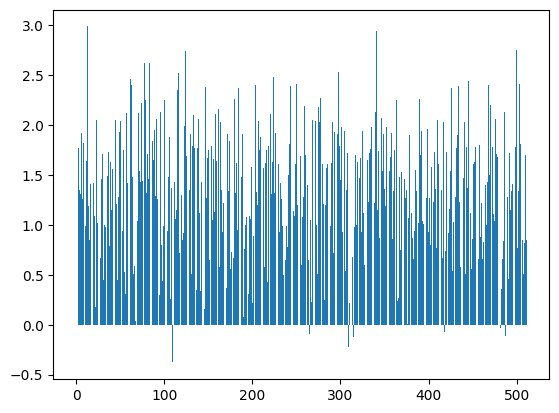

In [4]:
import matplotlib.pyplot as plt

codebook = model.vector_quantizer.embedding.weight.mean(0)
plt.bar(range(512), codebook.detach().cpu().numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


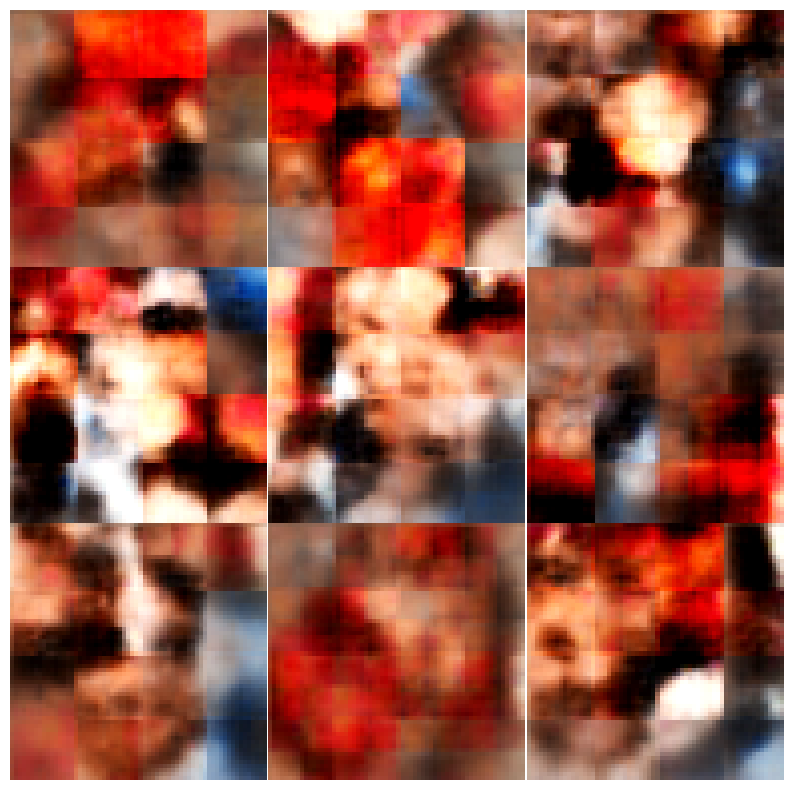

In [15]:
model.eval()
result = model.sample(9)


def de_normal(x):
    return x * torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1) + torch.tensor(
        [0.485, 0.456, 0.406]
    ).view(1, 3, 1, 1)


plt.rcParams["figure.figsize"] = (10, 10)
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis("off")
    plt.imshow(de_normal(result)[i].permute(1, 2, 0).detach().numpy())

In [19]:
result.max()

tensor(1.3507, grad_fn=<MaxBackward1>)